In [2]:
#!pip install pandas-profiling
#!pip3 install -U matplotlib
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
#import ydata_profiling
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
%matplotlib inline

In [3]:
df = pd.read_csv('dataset.csv')

In [4]:
df.head(5)

,Marital status,Application mode,Application order,Course,Daytime/evening attendance,Previous qualification,Nacionality,Mother's qualification,Father's qualification,Mother's occupation,...,Curricular units 2nd sem (credited),Curricular units 2nd sem (enrolled),Curricular units 2nd sem (evaluations),Curricular units 2nd sem (approved),Curricular units 2nd sem (grade),Curricular units 2nd sem (without evaluations),Unemployment rate,Inflation rate,GDP,Target
0,1,8,5,2,1,1,1,13,10,6,...,0,0,0,0,0.000000,0,10.8,1.4,1.74,Dropout
1,1,6,1,11,1,1,1,1,3,4,...,0,6,6,6,13.666667,0,13.9,-0.3,0.79,Graduate
2,1,1,5,5,1,1,1,22,27,10,...,0,6,0,0,0.000000,0,10.8,1.4,1.74,Dropout
3,1,8,2,15,1,1,1,23,27,6,...,0,6,10,5,12.400000,0,9.4,-0.8,-3.12,Graduate
4,2,12,1,3,0,1,1,22,28,10,...,0,6,6,6,13.000000,0,13.9,-0.3,0.79,Graduate


<Axes: >

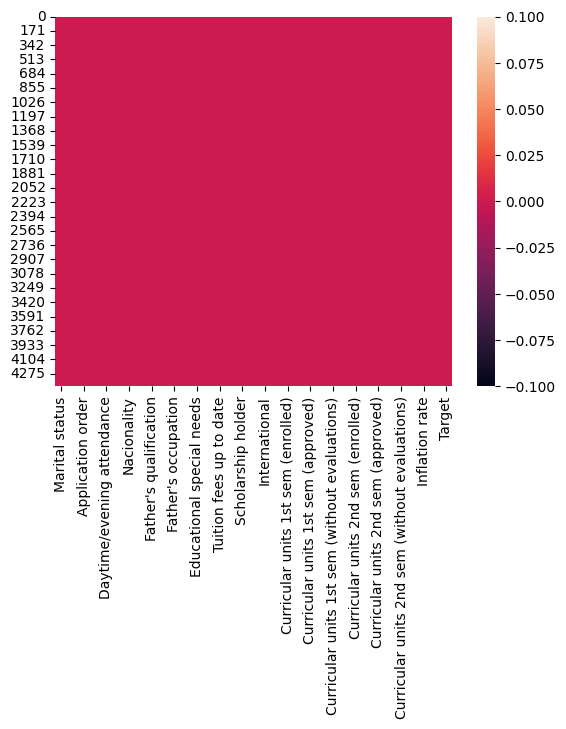

In [5]:
#check null value
sns.heatmap(df.isnull())

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4424 entries, 0 to 4423
Data columns (total 35 columns):
 #   Column                                          Non-Null Count  Dtype  
---  ------                                          --------------  -----  
 0   Marital status                                  4424 non-null   int64  
 1   Application mode                                4424 non-null   int64  
 2   Application order                               4424 non-null   int64  
 3   Course                                          4424 non-null   int64  
 4   Daytime/evening attendance                      4424 non-null   int64  
 5   Previous qualification                          4424 non-null   int64  
 6   Nacionality                                     4424 non-null   int64  
 7   Mother's qualification                          4424 non-null   int64  
 8   Father's qualification                          4424 non-null   int64  
 9   Mother's occupation                      

In [9]:
# Importing LabelEncoder from Sklearn
# library from preprocessing Module.
from sklearn.preprocessing import LabelEncoder

# Creating a instance of label Encoder.
le = LabelEncoder()

# Using .fit_transform function to fit label
# encoder and return encoded label
label = le.fit_transform(df['Target'])
# removing the column 'Purchased' from df
# as it is of no use now.
df.drop("Target", axis=1, inplace=True)

# Appending the array to our dataFrame
# with column name 'Purchased'
df["Target"] = label

# printing Dataframe
df.tail(5)
df['Target'].unique()

array([0, 2, 1], dtype=int64)

In [10]:
#checking duplicate values
duplicate_rows_df = df[df.duplicated()]
print(duplicate_rows_df.shape)

(0, 35)


In [11]:
#sns.pairplot(df)

<Axes: >

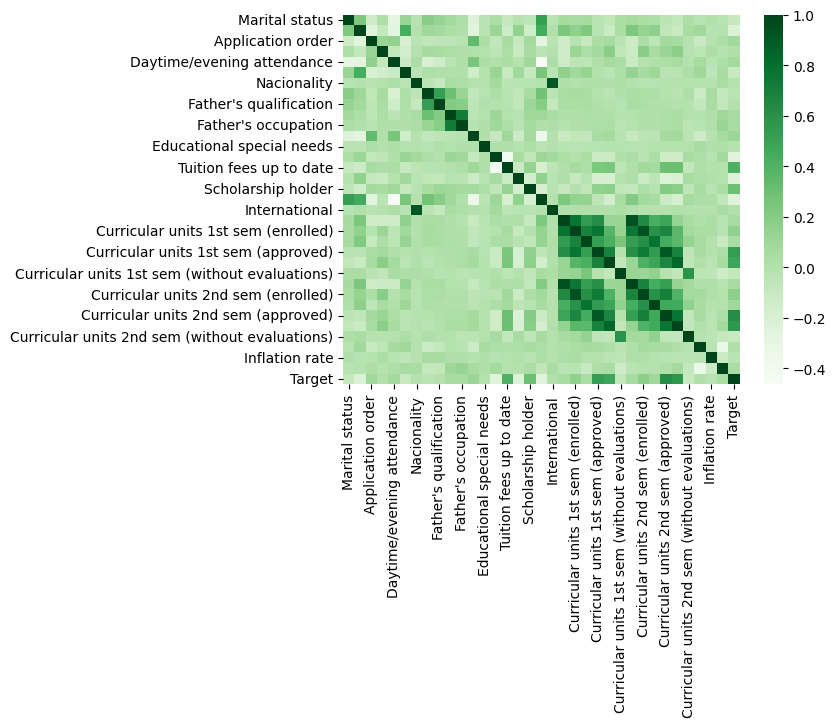

In [12]:
sns.heatmap(df.corr(),cmap="Greens")

In [13]:
df.tail(5)

,Marital status,Application mode,Application order,Course,Daytime/evening attendance,Previous qualification,Nacionality,Mother's qualification,Father's qualification,Mother's occupation,...,Curricular units 2nd sem (credited),Curricular units 2nd sem (enrolled),Curricular units 2nd sem (evaluations),Curricular units 2nd sem (approved),Curricular units 2nd sem (grade),Curricular units 2nd sem (without evaluations),Unemployment rate,Inflation rate,GDP,Target
4419,1,1,6,15,1,1,1,1,1,6,...,0,6,8,5,12.666667,0,15.5,2.8,-4.06,2
4420,1,1,2,15,1,1,19,1,1,10,...,0,6,6,2,11.000000,0,11.1,0.6,2.02,0
4421,1,1,1,12,1,1,1,22,27,10,...,0,8,9,1,13.500000,0,13.9,-0.3,0.79,0
4422,1,1,1,9,1,1,1,22,27,8,...,0,5,6,5,12.000000,0,9.4,-0.8,-3.12,2
4423,1,5,1,15,1,1,9,23,27,6,...,0,6,6,6,13.000000,0,12.7,3.7,-1.70,2


In [14]:
df.dtypes

Marital status                                      int64
Application mode                                    int64
Application order                                   int64
Course                                              int64
Daytime/evening attendance                          int64
Previous qualification                              int64
Nacionality                                         int64
Mother's qualification                              int64
Father's qualification                              int64
Mother's occupation                                 int64
Father's occupation                                 int64
Displaced                                           int64
Educational special needs                           int64
Debtor                                              int64
Tuition fees up to date                             int64
Gender                                              int64
Scholarship holder                                  int64
Age at enrollm

In [15]:
X = df.drop(['Target'],axis=1)
y = df['Target']

In [21]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.3 ,random_state=42)

In [22]:
from sklearn.model_selection import RepeatedStratifiedKFold
cv = RepeatedStratifiedKFold(n_splits=5,n_repeats=10,random_state=10)

In [27]:
param_grid = [  {'n_estimators': range(50, 150, 10), 'max_features': ['sqrt','log2','None'],'max_depth' : range(1,10,1),
 'min_samples_leaf' : range(1,10,1), 'min_samples_split': range(2,10,1),
'bootstrap': [True,False], }]

In [28]:
rf = RandomForestClassifier()

In [29]:
grid_search = GridSearchCV(rf, param_grid, cv=cv, return_train_score=True, n_jobs = -1)

In [31]:
grid_search.fit(X_train, y_train)

C:\Users\bimoc\OneDrive\Documents\Applied\ensemble\lib\site-packages\sklearn\model_selection\_validation.py:378: FitFailedWarning: 
648000 fits failed out of a total of 1944000.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
283514 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\bimoc\OneDrive\Documents\Applied\ensemble\lib\site-packages\sklearn\model_selection\_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\bimoc\OneDrive\Documents\Applied\ensemble\lib\site-packages\sklearn\ensemble\_forest.py", line 340, in fit
    self._validate_params()
  File "C:\Users\bimoc\OneDrive\Documents\Applied\ensemble\lib\site-packages\sklearn\base.py"

GridSearchCV(cv=RepeatedStratifiedKFold(n_repeats=10, n_splits=5, random_state=10),
             estimator=RandomForestClassifier(), n_jobs=-1,
             param_grid=[{'bootstrap': [True, False], 'max_depth': range(1, 10),
                          'max_features': ['sqrt', 'log2', 'None'],
                          'min_samples_leaf': range(1, 10),
                          'min_samples_split': range(2, 10),
                          'n_estimators': range(50, 150, 10)}],
             return_train_score=True)

In [32]:
grid_search.cv_results_

{'mean_fit_time': array([0.15131963, 0.1816134 , 0.20846663, ..., 0.00209473, 0.0019935 ,
        0.00179112]),
 'std_fit_time': array([0.0094369 , 0.00985836, 0.00985364, ..., 0.00287157, 0.00345161,
        0.00262726]),
 'mean_score_time': array([0.0121432 , 0.01332229, 0.01451023, ..., 0.        , 0.        ,
        0.        ]),
 'std_score_time': array([0.006469  , 0.00626336, 0.00465061, ..., 0.        , 0.        ,
        0.        ]),
 'param_bootstrap': masked_array(data=[True, True, True, ..., False, False, False],
              mask=[False, False, False, ..., False, False, False],
        fill_value='?',
             dtype=object),
 'param_max_depth': masked_array(data=[1, 1, 1, ..., 9, 9, 9],
              mask=[False, False, False, ..., False, False, False],
        fill_value='?',
             dtype=object),
 'param_max_features': masked_array(data=['sqrt', 'sqrt', 'sqrt', ..., 'None', 'None', 'None'],
              mask=[False, False, False, ..., False, False, False],

In [33]:
grid_search.best_estimator_

RandomForestClassifier(bootstrap=False, max_depth=9, max_features='log2',
                       n_estimators=130)

In [34]:
grid_search.best_score_
#cross validation training score

0.7708339152639532

In [35]:
best_rf = grid_search.best_estimator_

In [36]:
best_rf.fit(X_train,y_train)

RandomForestClassifier(bootstrap=False, max_depth=9, max_features='log2',
                       n_estimators=130)

In [37]:
pred_y = best_rf.predict(X_test)

In [58]:
from sklearn.metrics import accuracy_score,recall_score, precision_score,classification_report,f1_score,confusion_matrix

In [59]:
accuracy = accuracy_score(y_test,pred_y)
recall = recall_score(y_test, pred_y, average='macro')
precision = precision_score(y_test, pred_y, average='macro')
f1 = f1_score(y_test,pred_y,average='macro')

In [60]:
print('Accuracy is:',accuracy)
print('Recall is: ',recall)
print('precision is: ', precision)
print('f1 is: ',f1)
#test_accuracy

Accuracy is: 0.7695783132530121
Recall is:  0.6733521238194135
precision is:  0.7352883776461404
f1 is:  0.6824819145905181


In [55]:
print(classification_report(y_test, pred_y))

              precision    recall  f1-score   support

           0       0.82      0.77      0.79       441
           1       0.62      0.30      0.41       245
           2       0.77      0.95      0.85       642

    accuracy                           0.77      1328
   macro avg       0.74      0.67      0.68      1328
weighted avg       0.76      0.77      0.75      1328



In [57]:
print(confusion_matrix(y_test, pred_y))

[[340  27  74]
 [ 60  74 111]
 [ 16  18 608]]


In [56]:
from xgboost import XGBClassifier

In [57]:
xgb= XGBClassifier()

In [58]:
param_grid1 = [{"learning_rate"    : [0.05, 0.10, 0.15] ,
 "max_depth"        : [ 3,10,15],
 "min_child_weight" : [ 1, 3, 5, 7 ],
 "gamma"            : [ 0.0, 0.1, 0.2],
 "colsample_bytree" : [ 0.3, 0.4, 0.5] }]


In [59]:
grid_search = GridSearchCV(xgb, param_grid1, cv=5, return_train_score=True, n_jobs = -1)

In [ ]:
grid_search.fit(X_train, y_train)

/home/utlan/Documents/ml/lib/python3.8/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
/home/utlan/Documents/ml/lib/python3.8/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
/home/utlan/Documents/ml/lib/python3.8/site-packages/xgboost/sklearn.py:

/home/utlan/Documents/ml/lib/python3.8/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
/home/utlan/Documents/ml/lib/python3.8/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
/home/utlan/Documents/ml/lib/python3.8/site-packages/xgboost/sklearn.py:

[15:17:10] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[15:19:39] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[15:22:09] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[15:23:59] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the ol

[15:17:09] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[15:19:31] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[15:22:01] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[15:24:49] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the ol

/home/utlan/Documents/ml/lib/python3.8/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
/home/utlan/Documents/ml/lib/python3.8/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
/home/utlan/Documents/ml/lib/python3.8/site-packages/xgboost/sklearn.py:

[15:17:10] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[15:19:33] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[15:21:54] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[15:24:29] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the ol

/home/utlan/Documents/ml/lib/python3.8/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
/home/utlan/Documents/ml/lib/python3.8/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
/home/utlan/Documents/ml/lib/python3.8/site-packages/xgboost/sklearn.py:

/home/utlan/Documents/ml/lib/python3.8/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
/home/utlan/Documents/ml/lib/python3.8/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
/home/utlan/Documents/ml/lib/python3.8/site-packages/xgboost/sklearn.py: